# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [140]:
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

#### In order to understand how water treatment plants are run we decided to focus on specific areas such as assessing Predictive Maintenance.


In [141]:

df = pd.get_dummies(df, columns=['WaterworksName','GravityPressureMixed','AerationType'])
df['PrimaryTrigger'] = df['PrimaryTrigger'].astype('category').cat.codes
df['Stages'] = df['Stages'].astype('category').cat.codes



# Predictive Maintenance
-  ~~Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)~~
-  ~~Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?~~
-  Scale numeric data.
-  ~~For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?~~
-  ~~Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?~~
-  ~~If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.~~
-  ~~Create a correlation matrix and discuss - based on this, you might want to drop certain columns.~~
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  ~~There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions.~~
-  ~~Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.~~

In [142]:
columns_to_keep = [
    "TotalFilters", 
    "MaxTypicalFlow", 
    "AverageTypicalRunVolume",
    "AverageBackwashVolume", 
    "PrimaryTrigger", 
    "AverageTotalFilterDepth", 
    "OverallFilterGrainSizeMin",
    "OverallFilterGrainSizeMax", 
    "UniformityCoefficient", 
    "UFRV", 
    "BW%"
]
df_maintenance = df[columns_to_keep]

In [143]:
null_counts = df_maintenance.isnull().sum()
null_percentage = (null_counts / len(df_maintenance)) * 100

# Create a summary DataFrame
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Percentage of Nulls': null_percentage
})

print(null_summary)

# We try to see if any of the total filter rows had the value 0 as it would mean that all the columns related to filter would be null
zero_count = (df['TotalFilters'] == 0).sum()
print(zero_count)



                           Null Count  Percentage of Nulls
TotalFilters                        0             0.000000
MaxTypicalFlow                     16            20.253165
AverageTypicalRunVolume             2             2.531646
AverageBackwashVolume              10            12.658228
PrimaryTrigger                      0             0.000000
AverageTotalFilterDepth            33            41.772152
OverallFilterGrainSizeMin          34            43.037975
OverallFilterGrainSizeMax          34            43.037975
UniformityCoefficient              51            64.556962
UFRV                                7             8.860759
BW%                                13            16.455696
0


In [144]:
#Only keeping relevant columns and deleting the rows with nulls
df_maintenance_vs = df_maintenance.drop(columns=['UniformityCoefficient', 'AverageTotalFilterDepth','OverallFilterGrainSizeMin','OverallFilterGrainSizeMax'])
df_maintenance_vs = df_maintenance_vs.dropna()

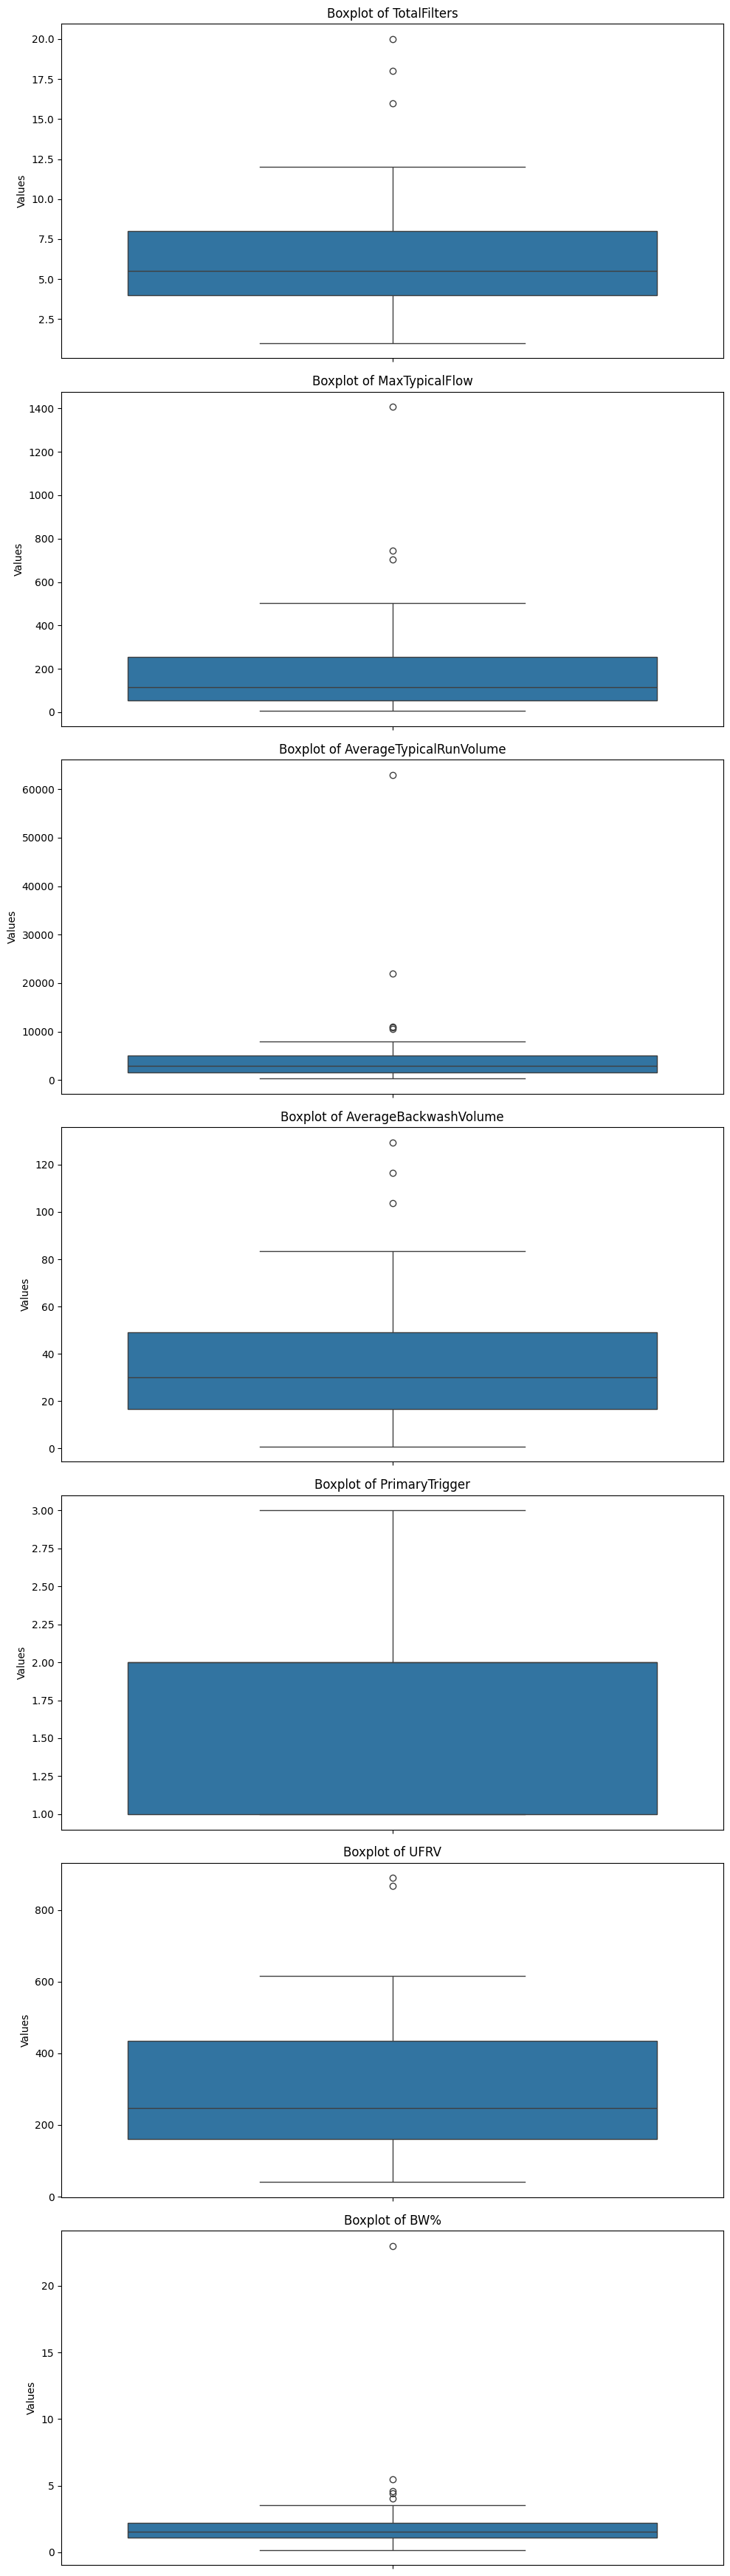

In [145]:
num_columns = len(df_maintenance_vs.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

# Create a boxplot for each column in separate subplots
for ax, column in zip(axes, df_maintenance_vs.columns):
    sns.boxplot(data=df_maintenance_vs, y=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

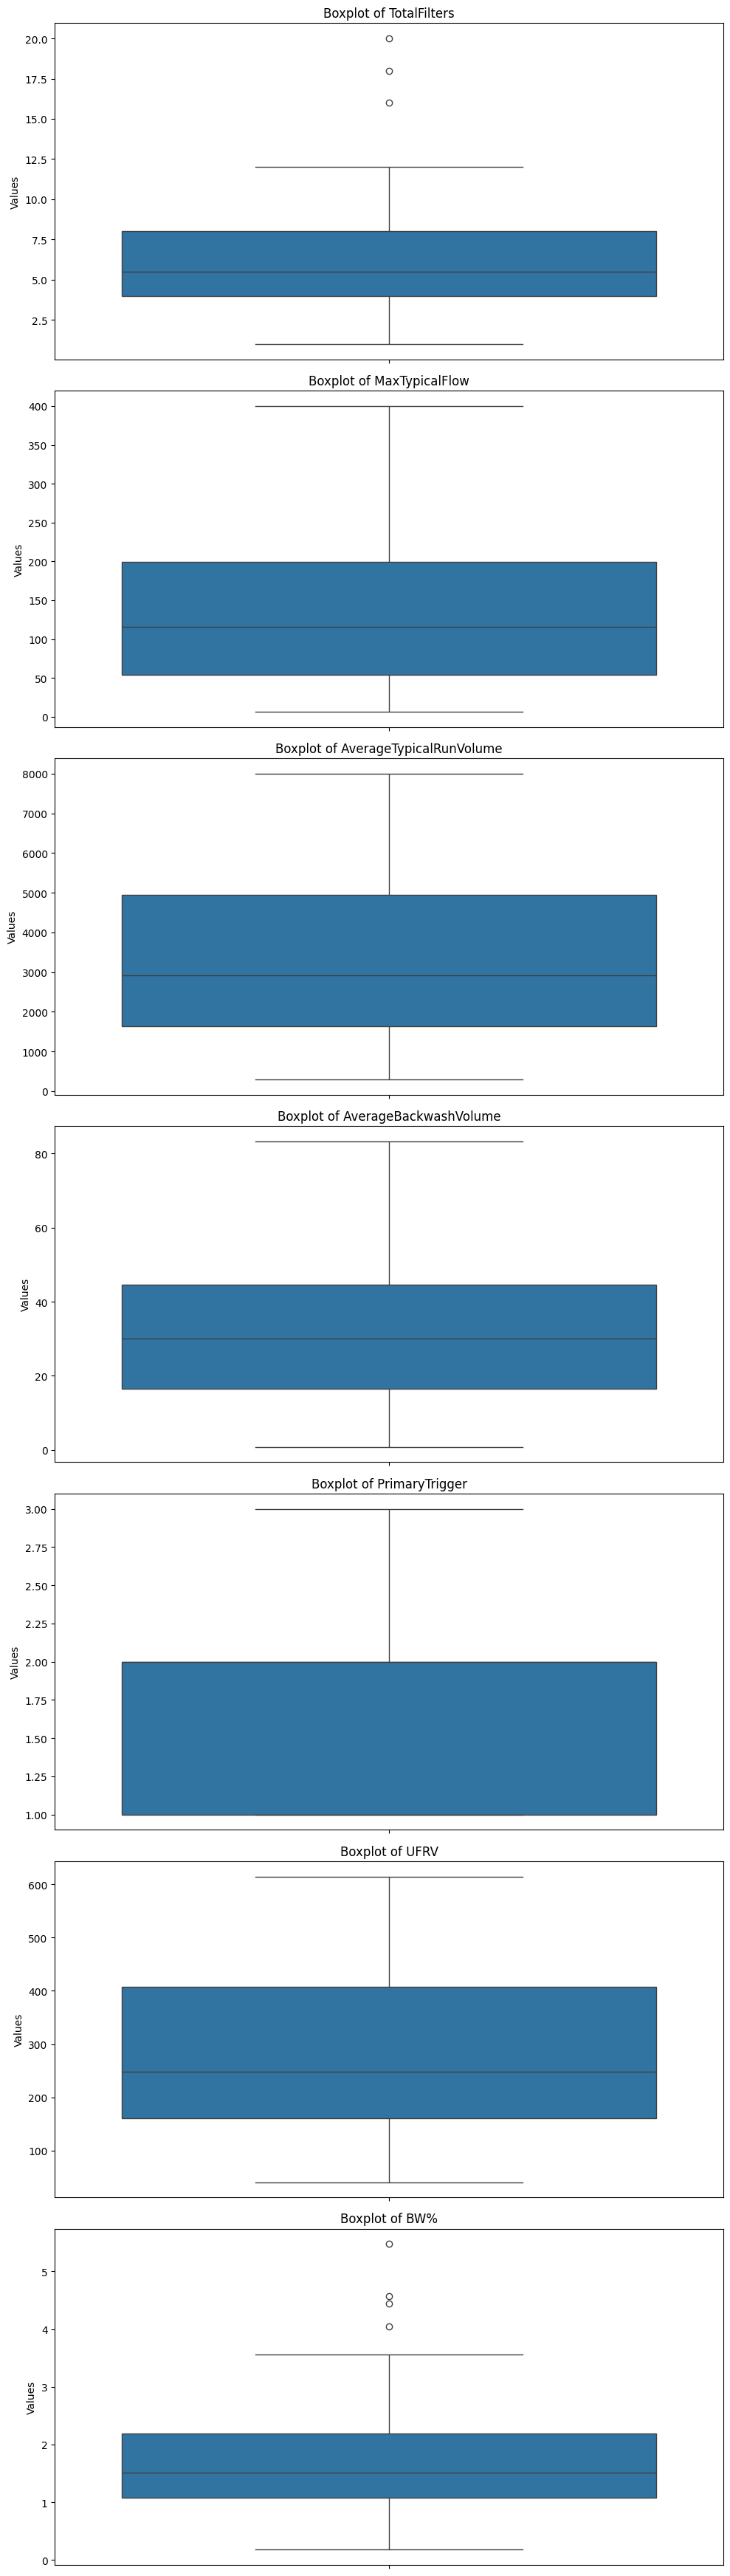

In [146]:
df_maintenance_vs['MaxTypicalFlow'] = df_maintenance_vs['MaxTypicalFlow'].where(df_maintenance_vs['MaxTypicalFlow'] <= 420, df_maintenance_vs['MaxTypicalFlow'].mean())
df_maintenance_vs['AverageTypicalRunVolume'] = df_maintenance_vs['AverageTypicalRunVolume'].where(df_maintenance_vs['AverageTypicalRunVolume'] <= 10000, df_maintenance_vs['AverageTypicalRunVolume'].mean())
df_maintenance_vs['AverageBackwashVolume'] = df_maintenance_vs['AverageBackwashVolume'].where(df_maintenance_vs['AverageBackwashVolume'] <= 100, df_maintenance_vs['AverageBackwashVolume'].mean())
df_maintenance_vs['UFRV'] = df_maintenance_vs['UFRV'].where(df_maintenance_vs['UFRV'] <= 800, df_maintenance_vs['UFRV'].mean())
df_maintenance_vs['BW%'] = df_maintenance_vs['BW%'].where(df_maintenance_vs['BW%'] <= 10, df_maintenance_vs['BW%'].mean())

num_columns = len(df_maintenance_vs.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

# Create a boxplot for each column in separate subplots
for ax, column in zip(axes, df_maintenance_vs.columns):
    sns.boxplot(data=df_maintenance_vs, y=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

,TotalFilters,MaxTypicalFlow,AverageTypicalRunVolume,AverageBackwashVolume
TotalFilters,1.000000,0.585693,NaN,NaN
MaxTypicalFlow,0.585693,1.000000,NaN,0.493057
AverageTypicalRunVolume,NaN,NaN,1.000000,0.403762
AverageBackwashVolume,NaN,0.493057,0.403762,1.000000


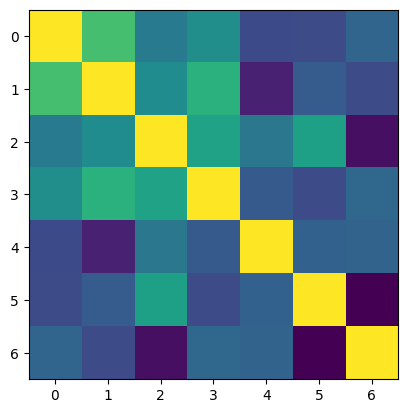

In [147]:
#Check correlation
plt.imshow(df_maintenance_vs.corr())
my_corr = df_maintenance_vs.corr()
my_corr[my_corr > 0.4].dropna(thresh=2).dropna(thresh=2,axis=1)

In [148]:
df_maintenance_vs = df_maintenance_vs.drop(columns=['PrimaryTrigger','BW%'])


Scaling - Decided it is not needed. If we use Random Forest and Gradient Boosting Models to assess predictive maintenance, then there would be no need to scale data as they are tree-based models, and  the way they make decisions does not tepend on the distance between points.

Justification for using the models: they can handle non-linear relationships and a mix of categorical and numerical values, and provide additional insights sinto feature imporance. 

##### Transformations of data

In [ ]:
## Checking the skew
skewness = df_maintenance_vs.skew()
print(f'Skewness of YourFeature: {skewness}')

##Fixing it 
df_maintenance_vs['MaxTypicalFlow'] = np.sqrt(df_maintenance_vs['MaxTypicalFlow'] + 1)  # +1 to avoid sqrt(0)
df_maintenance_vs['AverageBackwashVolume'] = np.sqrt(df_maintenance_vs['AverageBackwashVolume'] + 1)  # +1 to avoid sqrt(0)
df_maintenance_vs['UFRV'] = np.sqrt(df_maintenance_vs['UFRV'] + 1)  # +1 to avoid sqrt(0)


## Checking the skew
skewness = df_maintenance_vs.skew()
print(f'Skewness of YourFeature: {skewness}')


Skewness of YourFeature: TotalFilters               1.406793
MaxTypicalFlow             0.810712
AverageTypicalRunVolume    0.264483
AverageBackwashVolume      0.548845
UFRV                       0.550842
dtype: float64
Skewness of YourFeature: TotalFilters               1.406793
MaxTypicalFlow             0.089651
AverageTypicalRunVolume    0.264483
AverageBackwashVolume     -0.198219
UFRV                       0.076403
dtype: float64


We ended up checking the skewness of the distribution of our columns in order to see if we can stabilize the variance and normalize the data a bit more.

To do so, we used the skew() function which showed the degree and direction of the skew for each column. Based on what we researched, a skew from -0.5 to 0.5 is considered fairly symmetrical, so we checked our columns and concluded that three of them were moderately rightly skewed. As such, we applied square root transformation and ended up minimizing the skewness of it to achieve a more normal distribution.

The only column we did not transform is TotalFilters as it is the amount of filters, and it makes sense that the data for that column would have a larger variance in numbers, and trying to transform it would result in misusing the data as it wuold lose the context and skew with the results. 